In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = load_digits()

In [3]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [4]:
df["target"] = data.target

In [5]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
data.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

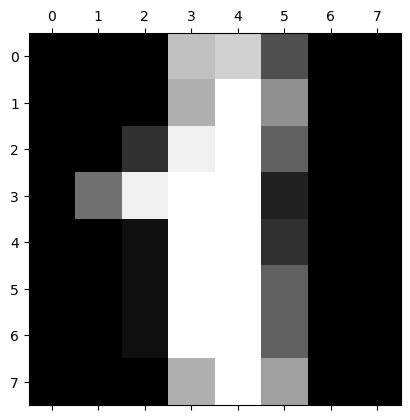

In [7]:
plt.gray()
plt.matshow(data.images[1])
plt.show()

<Figure size 640x480 with 0 Axes>

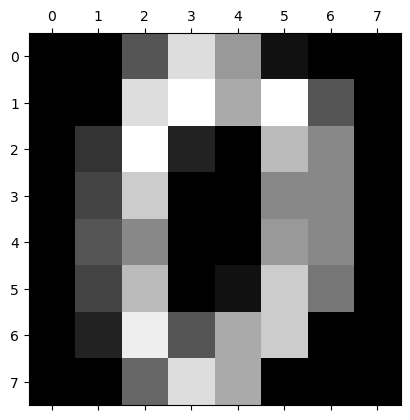

In [8]:
plt.gray()
plt.matshow(data.images[0])
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
X = df.drop("target",axis=1)

In [11]:
y = df.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=48)

In [17]:
pca_x = pca.fit_transform(X)
pca_x

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,  -0.5949869 ,
          0.04769233,  -0.71329407],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   1.27974828,
         -0.11983115,   0.34014615],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   1.21074417,
         -2.18626377,   0.88794293],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -0.15229141,
          0.26698638,  -0.38096517],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   0.83298175,
          2.06832814,  -0.64909048],
       [ -0.34438963,   6.36554919,  10.77370849, ...,   0.38694787,
          0.18109142,   1.0789026 ]])

In [18]:
X.shape

(1797, 64)

In [19]:
pca_x.shape

(1797, 48)

In [20]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_x, y, test_size=0.20, random_state=42)

In [21]:
X_train_pca.shape

(1437, 48)

In [22]:
X_test_pca.shape

(360, 48)

In [23]:
model = LogisticRegression()
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)

0.9722222222222222

In [24]:
# pca.explained_variance_ give a score of that particular columns remove in dataframe
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123,   5.1558669 ,   4.49129656,   4.24687799,
         4.04743883,   3.94340334,   3.70647245,   3.53165306,
         3.08457409,   2.73780002,   2.67210896,   2.54170563,
         2.28298744,   1.90724229,   1.81716569,   1.68996439,
         1.4019722 ,   1.29221888,   1.15893419,   0.93122001])

In [25]:
pca.explained_variance_.shape

(48,)